# Data Collection and preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('anemia.csv')

In [4]:
df.head()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [5]:
df.tail()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
1416,0,10.6,25.4,28.2,82.9,1
1417,1,12.1,28.3,30.4,86.9,1
1418,1,13.1,17.7,28.1,80.7,1
1419,0,14.3,16.2,29.5,95.2,0
1420,0,11.8,21.2,28.4,98.1,1


In [6]:
df.columns

Index(['Gender', 'Hemoglobin', 'MCH', 'MCHC', 'MCV', 'Result'], dtype='object')

In [7]:
df.isna()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1416,False,False,False,False,False,False
1417,False,False,False,False,False,False
1418,False,False,False,False,False,False
1419,False,False,False,False,False,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      1421 non-null   int64  
 1   Hemoglobin  1421 non-null   float64
 2   MCH         1421 non-null   float64
 3   MCHC        1421 non-null   float64
 4   MCV         1421 non-null   float64
 5   Result      1421 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 66.7 KB


In [9]:
df.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

# Handling Imabalanced Values

Text(0.5, 1.0, 'Count of Result')

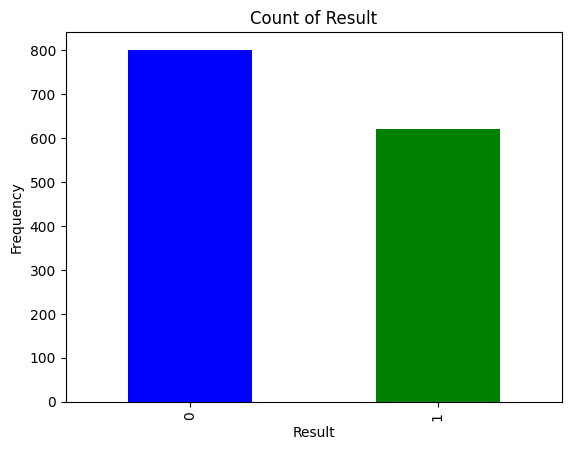

In [10]:
results = df['Result'].value_counts()
results.plot(kind='bar',color=['blue','green'])
plt.xlabel('Result')
plt.ylabel('Frequency')
plt.title('Count of Result')

In [11]:
df['Gender'].value_counts()

Gender
1    740
0    681
Name: count, dtype: int64

In [12]:
from sklearn.utils import resample
majorclass = df[df['Gender']==1]
minorclass = df[df['Gender']==0]
major_downsample = resample(majorclass, replace=False, n_samples=len(minorclass),random_state=42)
df=pd.concat([major_downsample,minorclass])
print(df['Gender'].value_counts())

Gender
1    681
0    681
Name: count, dtype: int64


Text(0.5, 1.0, 'Count of Gender')

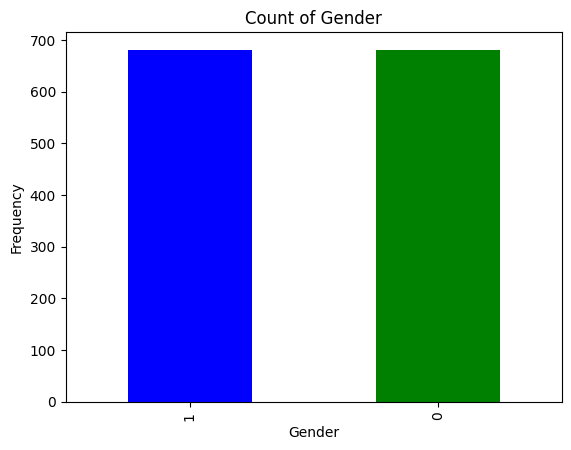

In [13]:
results = df['Gender'].value_counts()
results.plot(kind='bar',color=['blue','green'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Count of Gender')

# Descriptive Analysis


In [14]:
df.describe()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,0.500000,13.410720,22.920117,30.249119,85.588253,0.430250
std,0.500184,1.981235,3.990568,1.394880,9.640874,0.495293
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.100000,77.300000,0.000000
50%,0.500000,13.200000,22.800000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.300000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


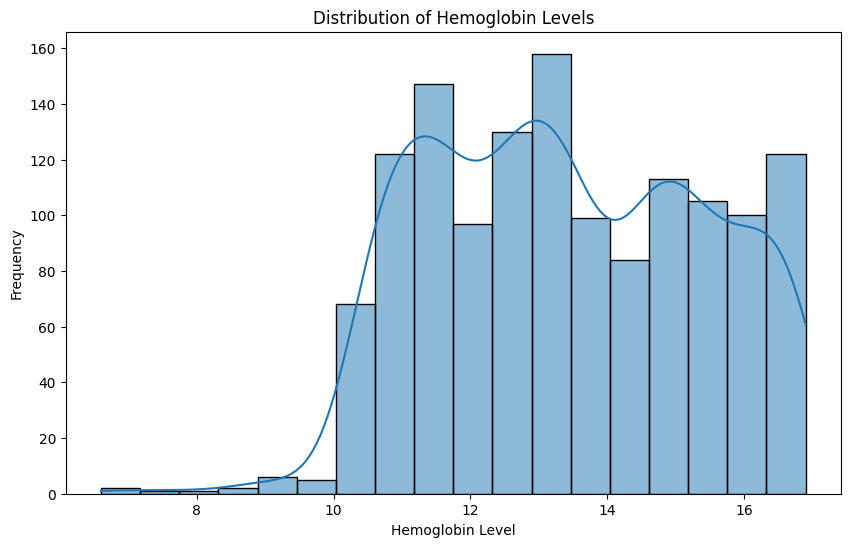

In [15]:

plt.figure(figsize=(10, 6))
sns.histplot(df['Hemoglobin'], kde=True)
plt.title('Distribution of Hemoglobin Levels')
plt.xlabel('Hemoglobin Level')
plt.ylabel('Frequency')
plt.show()



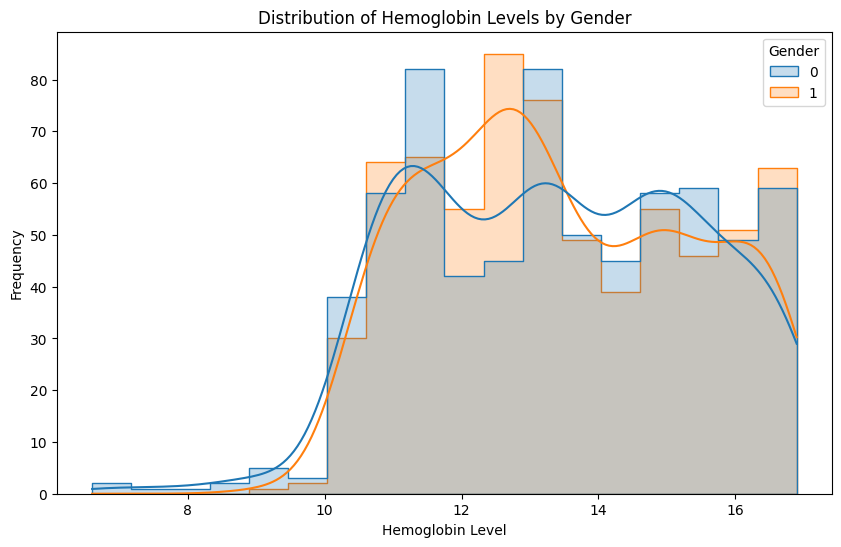

In [16]:

plt.figure(figsize=(10, 6))
sns.histplot(df, x='Hemoglobin', hue='Gender', element='step', kde=True)
plt.title('Distribution of Hemoglobin Levels by Gender')
plt.xlabel('Hemoglobin Level')
plt.ylabel('Frequency')
plt.show()


# Univariate Analysis

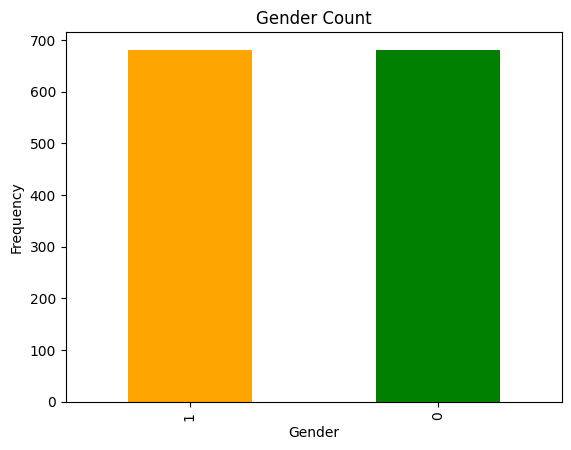

In [17]:
output=df['Gender'].value_counts()
output.plot(kind='bar',color=['orange','green'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Count')
plt.show()

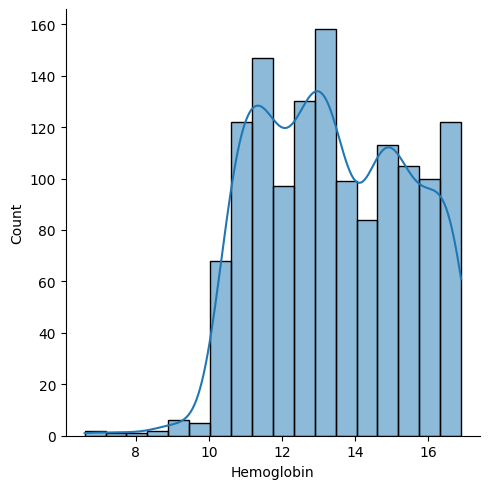

In [18]:
sns.displot(df['Hemoglobin'],kde=True)

# Bivariate Analysis

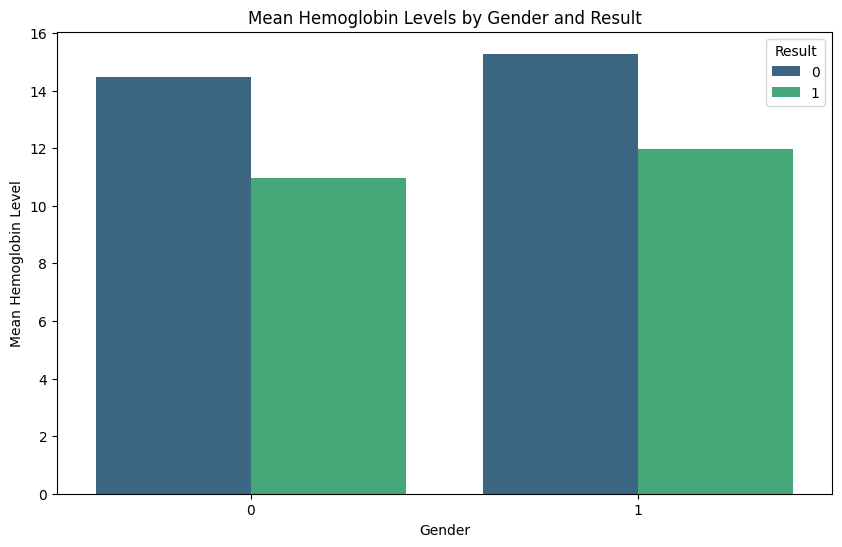

In [19]:

df = pd.read_csv('anemia.csv')
mean_hemoglobin = df.groupby(['Gender', 'Result'])['Hemoglobin'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Hemoglobin', hue='Result', data=mean_hemoglobin, palette='viridis')
plt.title('Mean Hemoglobin Levels by Gender and Result')
plt.xlabel('Gender')
plt.ylabel('Mean Hemoglobin Level')
plt.legend(title='Result')
plt.show()


C:\Users\rajas\AppData\Local\Temp\ipykernel_22912\1137517518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Hemoglobin', data=df, palette='viridis')


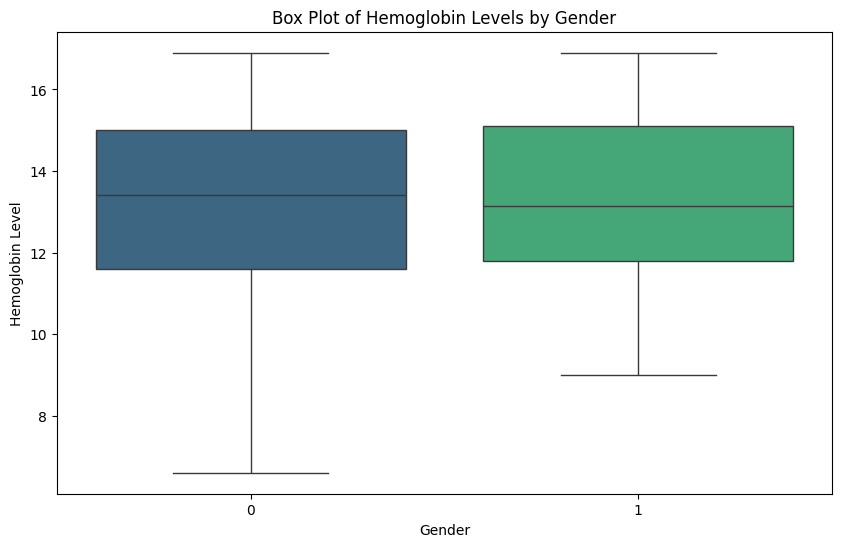

In [20]:
#box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Hemoglobin', data=df, palette='viridis')
plt.title('Box Plot of Hemoglobin Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Hemoglobin Level')
plt.show()

# Multivariate Analysis

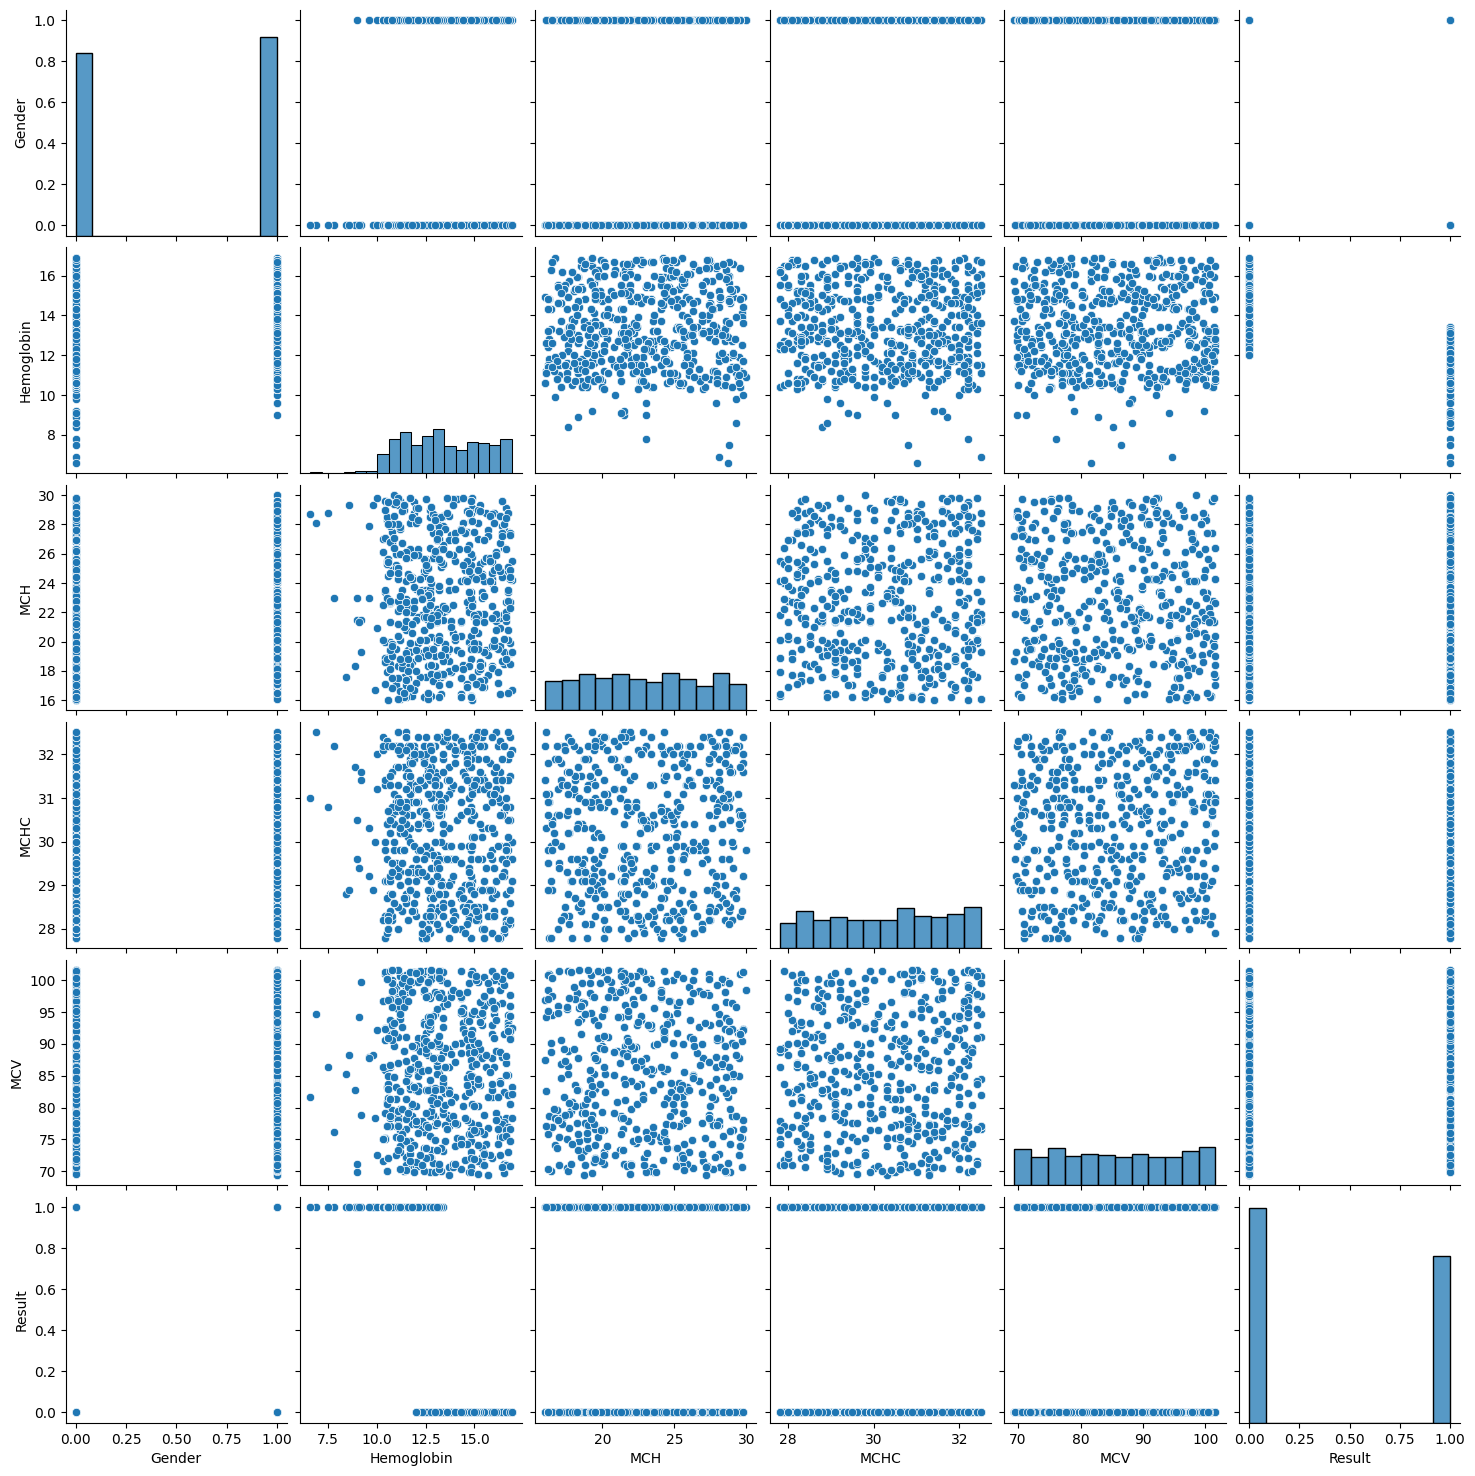

In [21]:
sns.pairplot(df)

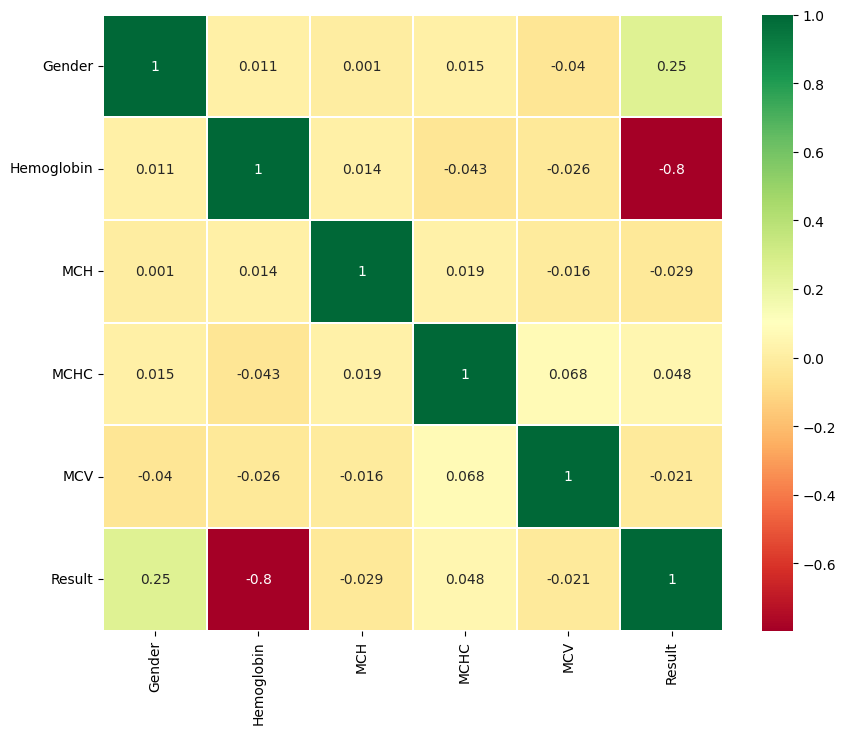

In [22]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


# Splitting Data Into Train and Test

In [23]:
X=df.drop('Result',axis = 1)
X

,Gender,Hemoglobin,MCH,MCHC,MCV
0,1,14.9,22.7,29.1,83.7
1,0,15.9,25.4,28.3,72.0
2,0,9.0,21.5,29.6,71.2
3,0,14.9,16.0,31.4,87.5
4,1,14.7,22.0,28.2,99.5
...,...,...,...,...,...
1416,0,10.6,25.4,28.2,82.9
1417,1,12.1,28.3,30.4,86.9
1418,1,13.1,17.7,28.1,80.7
1419,0,14.3,16.2,29.5,95.2


In [24]:
Y=df['Result']
Y

0       0
1       0
2       1
3       0
4       0
       ..
1416    1
1417    1
1418    1
1419    0
1420    1
Name: Result, Length: 1421, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1136, 5)
(285, 5)
(1136,)
(285,)


# Model Building

## Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
logistic_regression=LogisticRegression()
logistic_regression.fit(x_train,y_train)


LogisticRegression()

In [30]:
pred=logistic_regression.predict(x_test)

In [31]:
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [32]:
acc_lr=accuracy_score(y_test,pred)

In [33]:
confusion_matrix(y_test,pred)

array([[167,   0],
       [  0, 118]], dtype=int64)

In [34]:
acc_lr=accuracy_score(y_test,pred)
c_lr=classification_report(y_test,pred)

In [35]:
print('Accuracy Score: ',acc_lr)
print(c_lr)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       118

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



## Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [38]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [39]:
pred=rf.predict(x_test)

In [40]:
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [41]:
y_test

689     0
1009    0
1171    0
1404    1
1229    0
       ..
159     0
646     0
300     1
807     0
709     0
Name: Result, Length: 285, dtype: int64

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
acc_rf=accuracy_score(y_test,pred)
print('Accuracy Score: ',acc_lr)
confusion_matrix(y_test,pred)

Accuracy Score:  1.0


array([[155,  12],
       [  5, 113]], dtype=int64)

In [68]:
c_lr=classification_report(y_test,pred)
print(c_lr)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       167
           1       0.90      0.96      0.93       118

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



## Decision Tree Model

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
decision_tree_model = DecisionTreeClassifier()

In [47]:
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [48]:
y_pred = decision_tree_model.predict(x_test)

In [49]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [50]:
y_test

689     0
1009    0
1171    0
1404    1
1229    0
       ..
159     0
646     0
300     1
807     0
709     0
Name: Result, Length: 285, dtype: int64

In [51]:
acc_dt = accuracy_score(y_test, y_pred)
acc_dt

1.0

In [52]:
conmat = confusion_matrix(y_test, y_pred)
conmat

array([[167,   0],
       [  0, 118]], dtype=int64)

In [53]:
c_dt = classification_report(y_test, y_pred)
print(c_dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       118

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



## Naive Bayes Model

In [54]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)  
pred = nb.predict(x_test) 
acc_nb=accuracy_score(pred,y_test)
c_nb=classification_report(pred,y_test)
print("Accuracy Score: ",acc_nb)
print(c_nb)

Accuracy Score:  0.9403508771929825
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       160
           1       0.96      0.90      0.93       125

    accuracy                           0.94       285
   macro avg       0.94      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285



In [64]:
conmat = confusion_matrix(y_test, pred)
conmat

array([[155,  12],
       [  5, 113]], dtype=int64)

In [ ]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best hyperparameters for Gaussian Naive Bayes:", grid_search.best_params_)
y_pred = best_svm.predict(x_test)

best_gnb = grid_search.best_estimator_
print("Gaussian Naive Bayes accuracy:", best_gnb.score(x_test, y_test))
report = classification_report(y_test, y_pred)
print("Classification Report for SVM:\n", report)

## SVM Model

In [55]:
from sklearn.preprocessing import StandardScaler    
from sklearn.svm import SVC
from sklearn import metrics
st_x= StandardScaler()   
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
support_vector=SVC()
support_vector.fit(x_train,y_train)
y_pred=support_vector.predict(x_test)
acc_svc=metrics.accuracy_score(y_test,y_pred)
c_svc=metrics.classification_report(y_test,y_pred)
print("accuracy_score: ",acc_svc)
print("classification_report: ")
print(c_svc)

accuracy_score:  0.9964912280701754
classification_report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       167
           1       0.99      1.00      1.00       118

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



In [65]:
conmat = confusion_matrix(y_test, pred)
conmat

array([[155,  12],
       [  5, 113]], dtype=int64)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  
    'gamma': ['scale', 'auto'], 
    'coef0': [0, 0.5, 1]  
}
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

y_pred = best_svm.predict(x_test)
print("The Best hyperparameters for SVM:", grid_search.best_params_)

best_svm = grid_search.best_estimator_
print("accuracy_score of SVM:", best_svm.score(x_test, y_test))
report = classification_report(y_test, y_pred)
print("Classification Report for SVM:\n", report)


## Gradient Boosting Classifier Model

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
GBC= GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred2=GBC.predict(x_test)
acc_gbc=metrics.accuracy_score(y_test,y_pred2)
c_gbc=metrics.classification_report(y_test,y_pred2)
print("accuracy_score: ",acc_gbc)
print("classification_report: ")
print(c_gbc)

accuracy_score:  1.0
classification_report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       118

    accuracy                           1.00       285
   macro avg       1.00      1.00      1.00       285
weighted avg       1.00      1.00      1.00       285



In [66]:
conmat = confusion_matrix(y_test, y_pred2)
conmat

array([[167,   0],
       [  0, 118]], dtype=int64)

# Testing the Models

In [57]:
#Logistic Regression Model 
pred_lr=logistic_regression.predict([[0,11.6,0,30.9,74.5]])
print("Logistic Regression:",pred_lr)
if(pred_lr==0):
    print("You don't have Anemic Disease")
elif(pred_lr==1):
    print("You have Anemic Disease")

Logistic Regression: [1]
You have Anemic Disease


C:\Users\rajas\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
#Random forest model
pred_rf=rf.predict([[0,11.6,0,30.9,74.5]])
print("Random forest:",pred_rf)
if(pred_rf==0):
    print("You don't have Anemic Disease")
elif(pred_rf==1):
    print("You have Anemic Disease")

Random forest: [1]
You have Anemic Disease


C:\Users\rajas\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [59]:
#Decision Tree Model 
pred_dt=decision_tree_model.predict([[0,11.6,0,30.9,74.5]])
print("Random forest:",pred_dt)
if(pred_dt==0):
    print("You don't have Anemic Disease")
elif(pred_dt==1):
    print("You have Anemic Disease")

Random forest: [1]
You have Anemic Disease


C:\Users\rajas\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [60]:
#Gaussian Navies Bayes 
pred_nb=nb.predict([[0,11.6,0,30.9,74.5]])
print("Random forest:",pred_nb)
if(pred_nb==0):
    print("You don't have Anemic Disease")
elif(pred_nb==1):
    print("You have Anemic Disease")

Random forest: [1]
You have Anemic Disease


C:\Users\rajas\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [61]:
#Support Vector Machine
pred_svm=support_vector.predict([[0,11.6,0,30.9,74.5]])
print("Random forest:",pred_svm)
if(pred_svm==0):
    print("You don't have Anemic Disease")
elif(pred_svm==1):
    print("You have Anemic Disease")

Random forest: [1]
You have Anemic Disease


In [62]:
#Gradient Boosting Classifier
pred_gbc=GBC.predict([[0,11.6,0,30.9,74.5]])
print("Random forest:",pred_gbc)
if(pred_gbc==0):
    print("You don't have Anemic Disease")
elif(pred_gbc==1):
    print("You have Anemic Disease")

Random forest: [0]
You don't have Anemic Disease


# Performace Testing

In [63]:
model = pd.DataFrame({'Model':['Linear Regression','Decision Tree Classifier','Random Forest Classifier','Gaussian Naive Bayes','Support Vector Machine',
                               'Gradient Boosting Classifier'],
                        'Score':[acc_lr,acc_dt,acc_rf,acc_nb,acc_svc,acc_gbc],
                     })
model

,Model,Score
0,Linear Regression,1.000000
1,Decision Tree Classifier,1.000000
2,Random Forest Classifier,1.000000
3,Gaussian Naive Bayes,0.940351
4,Support Vector Machine,0.996491
5,Gradient Boosting Classifier,1.000000
